# Simple regression with categorical predictors

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
# We can override the default matplotlib styles with the Seaborn styles.
sns.set()

In [2]:
raw_data = pd.read_csv(r'C:\Users\Iwona\Downloads\Resources\Downloaded csv files for portfolio\real estate price\real_estate_price_size_year_view.csv')
raw_data.head()

,price,size,year,view
0,234314.144,643.09,2015,No sea view
1,228581.528,656.22,2009,No sea view
2,281626.336,487.29,2018,Sea view
3,401255.608,1504.75,2015,No sea view
4,458674.256,1275.46,2009,Sea view


### Dealing with the categorical predictors.

In [3]:
# Maping all 'No sea view' entries with 0s, and all 'Sea view' entries with 1s.
data = raw_data.copy()
data['view'] = data['view'].map({'Sea view': 1, 'No sea view': 0})
data.head()

,price,size,year,view
0,234314.144,643.09,2015,0
1,228581.528,656.22,2009,0
2,281626.336,487.29,2018,1
3,401255.608,1504.75,2015,0
4,458674.256,1275.46,2009,1


In [4]:
data.describe()

,price,size,year,view
count,100.000000,100.000000,100.000000,100.000000
mean,292289.470160,853.024200,2012.600000,0.490000
std,77051.727525,297.941951,4.729021,0.502418
min,154282.128000,479.750000,2006.000000,0.000000
25%,234280.148000,643.330000,2009.000000,0.000000
50%,280590.716000,696.405000,2015.000000,0.000000
75%,335723.696000,1029.322500,2018.000000,1.000000
max,500681.128000,1842.510000,2018.000000,1.000000


### Regression

In [5]:
y = data ['price']
x1 = data [['size','view']]

In [6]:
# Adding a constant. Basically, we are adding a new column, which consists only of 1s
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     374.4
Date:                Sun, 28 Nov 2021   Prob (F-statistic):           2.44e-46
Time:                        19:38:13   Log-Likelihood:                -1158.3
No. Observations:                 100   AIC:                             2323.
Df Residuals:                      97   BIC:                             2330.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.748e+04   8337.182      9.294      0.000    6.09e+04     9.4e+04
size         218.7521      8.902     24.574      0.000     201.085     236.420
view        5.756e+04   5278.883     10.904      0.000    4.71e+04     6.8e+04
==============================================================================
Omnibus:                       24.354   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.619
Skew:                           0.896   Prob(JB):                     2.27e-12
Kurtosis:                       6.107   Cond. No.                     2.92e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.92e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

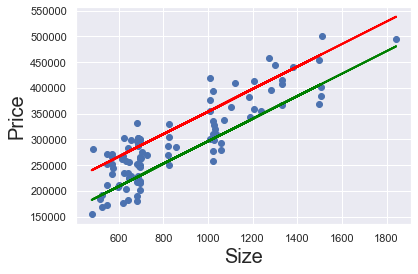

In [7]:
plt.scatter(data['size'],y)
# Defining the two regression equations, depending on whether there is See view (yes), or not (no)
yhat_yes = 135040 + 218.7521*data['size']
yhat_no = 77480.00 + 218.7521*data['size']
# Ploting the two regression lines
fig = plt.plot(data['size'],yhat_no, lw=2, c='green')
fig = plt.plot(data['size'],yhat_yes, lw=2, c='red')
plt.xlabel('Size', fontsize = 20)
plt.ylabel('Price', fontsize = 20)
plt.show()

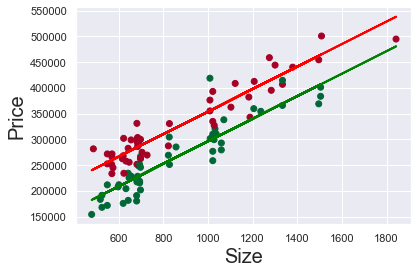

In [8]:
# Just for demonstration I want to colour the points depending on the 'view'.
plt.scatter(data['size'],data['price'], c=data['view'],cmap='RdYlGn_r')
yhat_no = 77480.00 + 218.7521*data['size']
yhat_yes = 135040 + 218.7521*data['size']
fig = plt.plot(data['size'],yhat_no, lw=2, c='green')
fig = plt.plot(data['size'],yhat_yes, lw=2, c='red')
plt.xlabel('Size', fontsize = 20)
plt.ylabel('Price', fontsize = 20)
plt.show()

### Adding the original regression line

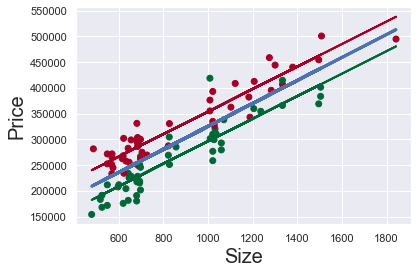

In [9]:

plt.scatter(data['size'],data['price'], c=data['view'],cmap='RdYlGn_r')

# Once again defining the two regression equations (one with a dummy = 1, the other with dummy = 0)
yhat_no = 77480.00 + 218.7521*data['size']
yhat_yes = 135040 + 218.7521*data['size']
# Adding original regression line
yhat = 223.1787*data['size']+101900
# Ploting the two regression lines
fig = plt.plot(data['size'],yhat_no, lw=2, c='#006837', label ='regression line1')
fig = plt.plot(data['size'],yhat_yes, lw=2, c='#a50026', label ='regression line2')
# Ploting the original regression line
fig = plt.plot(data['size'],yhat, lw=3, c='#4C72B0', label ='regression line')

plt.xlabel('Size', fontsize = 20)
plt.ylabel('Price', fontsize = 20)
plt.show()